### OCI Data Science - Useful Tips
Everything stored in the <span style="background-color: #d5d8dc ">/home/datascience</span> folder is now stored on your block volume drive. The <span style="background-color: #d5d8dc ">ads-examples</span> folder has moved outside of your working space. Notebook examples are now accessible through a Launcher tab "Notebook Examples" button.
<details>
<summary><font size="2">1. Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">2. OCI Configuration and Key Files Set Up</font></summary><p>Follow the instructions in the getting-started notebook. That notebook is accessible via the "Getting Started" Launcher tab button.</p>
</details>
<details>
<summary><font size="2">3. Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">4. Typical Cell Imports and Settings</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import MLData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">5. Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
alldata = pd.read_csv('./housesales.csv')

In [3]:
alldata.shape

(1460, 81)

In [4]:
alldata['SalePrice'][:10]

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

In [5]:
alldata['SalePrice'].isnull().sum()

0

In [6]:
minPrice = alldata['SalePrice'].min()
maxPrice = alldata['SalePrice'].max()

print('Min Sales Price (%d) - Max Sales Price (%d)' % (minPrice,maxPrice))

Min Sales Price (34900) - Max Sales Price (755000)


In [7]:
alldata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
alldata.select_dtypes(include=np.number).columns.tolist()

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [9]:
alldata.select_dtypes(include=[np.number])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


In [10]:
alldata.select_dtypes(exclude=np.number).columns.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
alldata.select_dtypes(exclude=[np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


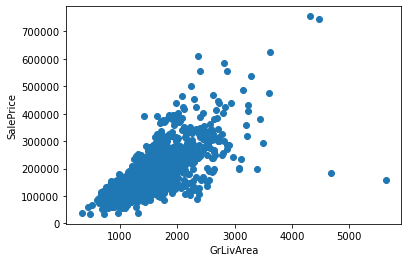

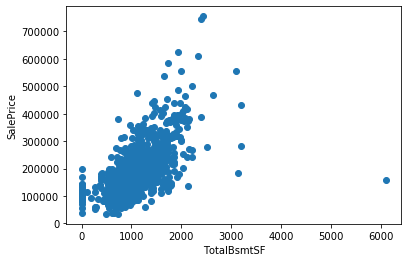

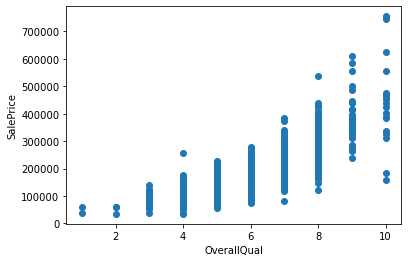

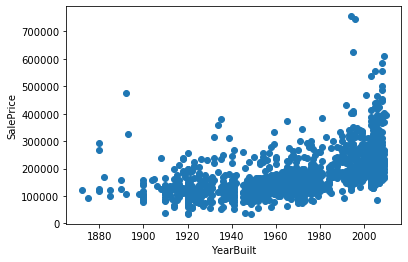

In [12]:
plot.scatter(alldata.GrLivArea, alldata.SalePrice)
plot.xlabel("GrLivArea")
plot.ylabel("SalePrice")
plot.show()
plot.scatter(alldata.TotalBsmtSF, alldata.SalePrice)
plot.xlabel("TotalBsmtSF")
plot.ylabel("SalePrice")
plot.show()
plot.scatter(alldata.OverallQual, alldata.SalePrice)
plot.xlabel("OverallQual")
plot.ylabel("SalePrice")
plot.show()
plot.scatter(alldata.YearBuilt, alldata.SalePrice)
plot.xlabel("YearBuilt")
plot.ylabel("SalePrice")
plot.show()

(-0.5, 4.5, 0, 800000)

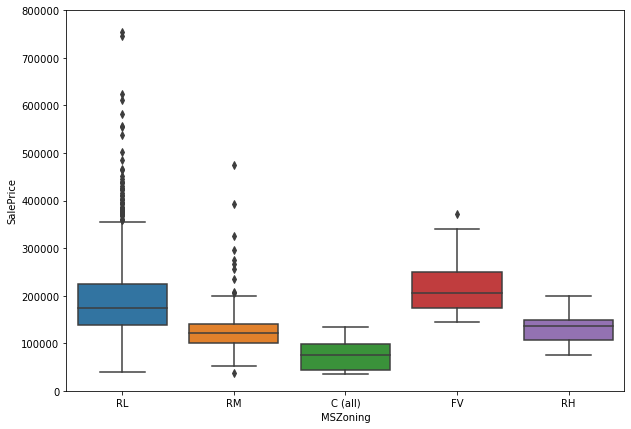

In [13]:
var = 'MSZoning'
data = pd.concat([alldata['SalePrice'], alldata[var]], axis=1)
f, ax = plot.subplots(figsize=(10, 7))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(-0.5, 24.5, 0, 800000)

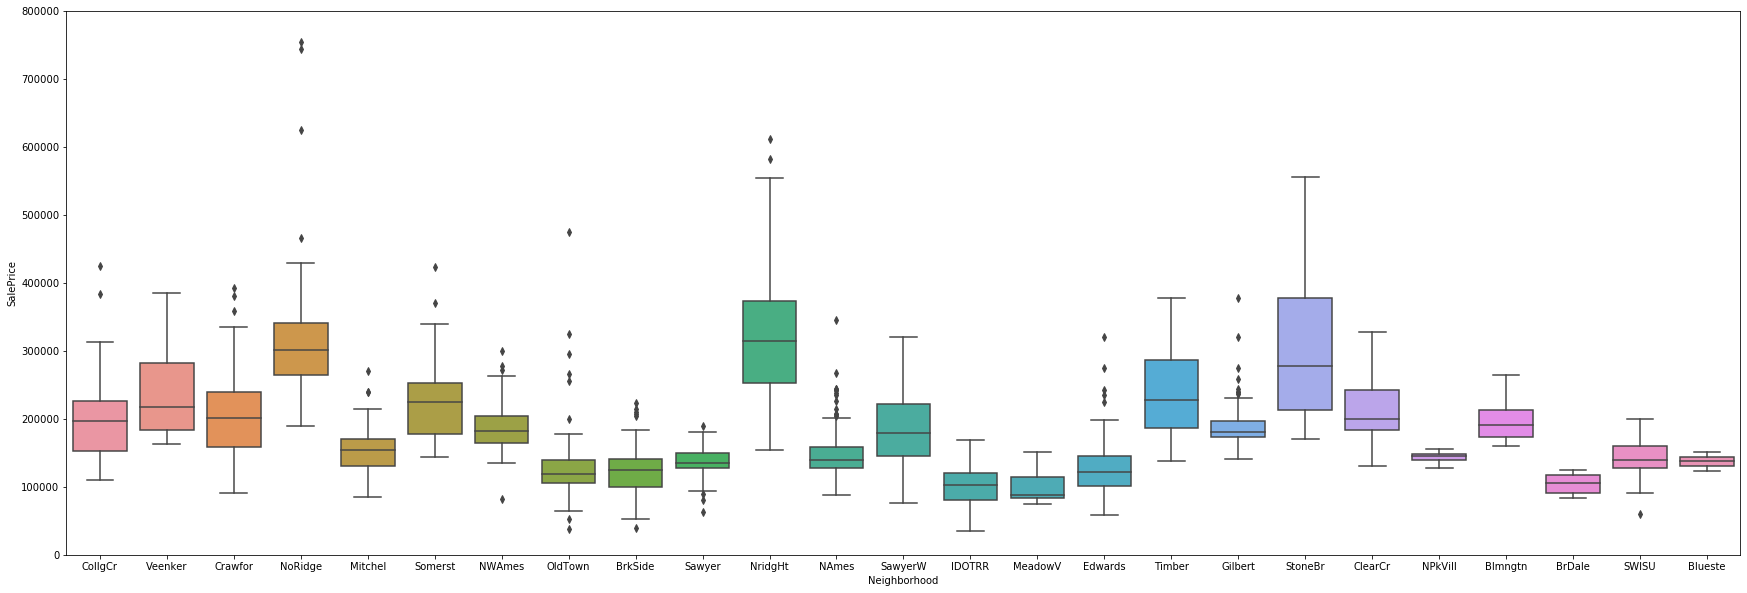

In [14]:
var = 'Neighborhood'
data = pd.concat([alldata['SalePrice'], alldata[var]], axis=1)
f, ax = plot.subplots(figsize=(30, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [15]:
corr = alldata.corr(method='spearman')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr.SalePrice

SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
BsmtUnfSF        0.185197
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
PoolArea         0.058453
MSSubClass       0.007192
BsmtHalfBath    -0.012189
Id              -0.018546
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
OverallCond     -0.129325
KitchenAbvGr    -0.164826
EnclosedPorch   -0.218394
Name: SalePr

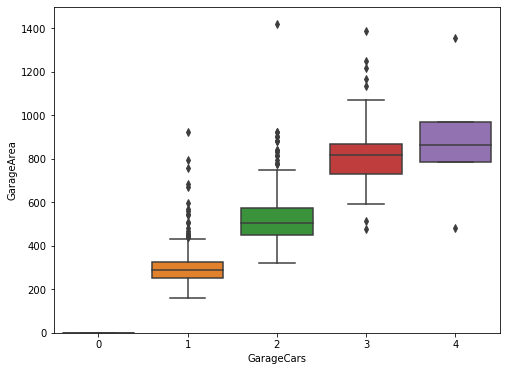

In [16]:
var = 'GarageCars'
data = pd.concat([alldata['GarageArea'], alldata[var]], axis=1)
f, ax = plot.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="GarageArea", data=data)
fig.axis(ymin=0, ymax=1500);

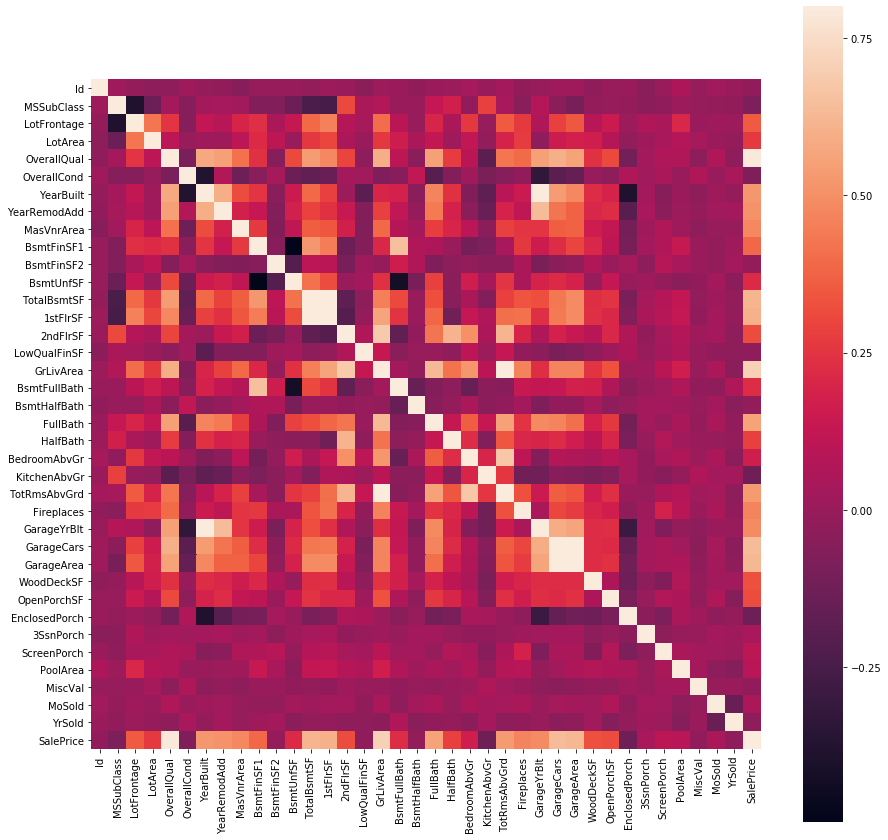

In [17]:
corrmat = alldata.corr()
f, ax = plot.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

In [18]:
total = alldata.isnull().sum().sort_values(ascending=False)
percent = (alldata.isnull().sum()/alldata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


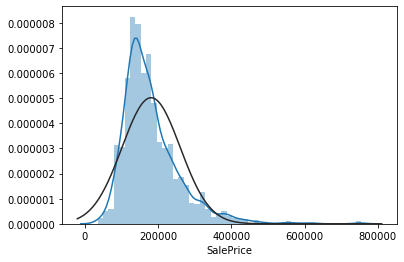

<Figure size 432x288 with 0 Axes>

In [19]:
sns.distplot(alldata['SalePrice'], fit=norm);
fig = plot.figure()

In [20]:
alldata = alldata.fillna({"PoolQC": "NA"})
alldata = alldata.fillna({"MiscFeature": "NA"})
alldata = alldata.fillna({"Alley": "NA"})
alldata = alldata.fillna({"Fence": "NA"})
alldata = alldata.fillna({"FireplaceQu": "NA"})
meanlot = alldata['LotFrontage'].mean()
alldata = alldata.fillna({"LotFrontage": meanlot})
alldata = alldata.dropna()

In [21]:
alldata.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,...,480,Gd,NA,NA,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NA,IR1,Bnk,AllPub,...,0,NA,NA,NA,0,10,2007,New,Partial,184750


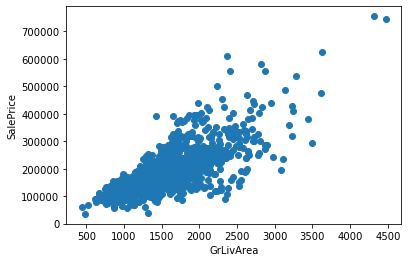

In [22]:
alldata = alldata.drop(alldata[alldata['Id'] == 1299].index)
alldata = alldata.drop(alldata[alldata['Id'] == 524].index)
plot.scatter(alldata.GrLivArea, alldata.SalePrice)
plot.xlabel("GrLivArea")
plot.ylabel("SalePrice")
plot.show()

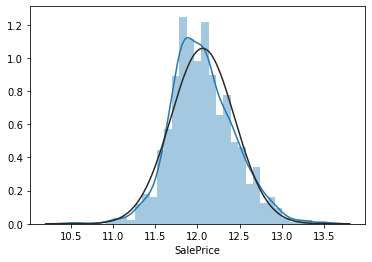

<Figure size 432x288 with 0 Axes>

In [23]:
y = np.log(alldata['SalePrice'])
sns.distplot(y, fit=norm)
fig = plot.figure()

In [24]:
alldata.drop("Id", axis = 1, inplace = True)
alldata.drop("BsmtFullBath", axis = 1, inplace = True)
alldata.drop("BsmtUnfSF", axis = 1, inplace = True)
alldata.drop("ScreenPorch", axis = 1, inplace = True)
alldata.drop("MoSold", axis = 1, inplace = True)
alldata.drop("3SsnPorch", axis = 1, inplace = True)
alldata.drop("PoolArea", axis = 1, inplace = True)
alldata.drop("MSSubClass", axis = 1, inplace = True)
alldata.drop("YrSold", axis = 1, inplace = True)
alldata.drop("BsmtFinSF2", axis = 1, inplace = True)
alldata.drop("MiscVal", axis = 1, inplace = True)
alldata.drop("LowQualFinSF", axis = 1, inplace = True)
alldata.drop("OverallCond", axis = 1, inplace = True)
alldata.drop("KitchenAbvGr", axis = 1, inplace = True)
alldata.drop("EnclosedPorch", axis = 1, inplace = True)

In [25]:
X = alldata.drop(['SalePrice'], axis=1)

In [26]:
X = pd.get_dummies(X)
X.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,856,856,854,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978,1262,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486,920,920,866,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216,756,961,756,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,1145,1145,1053,...,0,0,0,1,0,0,0,0,1,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=63, test_size=.20)

In [28]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [29]:
y_predicted = model.predict(X_test)

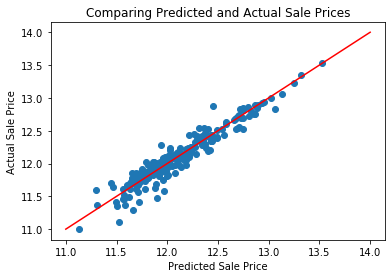

In [30]:
plot.scatter(y_predicted, y_test)
plot.xlabel('Predicted Sale Price')
plot.ylabel('Actual Sale Price')
plot.title('Comparing Predicted and Actual Sale Prices')
plot.plot(range(11, 15), range(11, 15), color="red")
plot.show()

In [31]:
print('RMSE: ', mean_squared_error(y_test, y_predicted))

RMSE:  0.012609759703155293


In [71]:
r = X_test.iloc[2]
r.to_json()

'{"LotFrontage":67.0,"LotArea":10656.0,"OverallQual":8.0,"YearBuilt":2006.0,"YearRemodAdd":2007.0,"MasVnrArea":274.0,"BsmtFinSF1":0.0,"TotalBsmtSF":1638.0,"1stFlrSF":1646.0,"2ndFlrSF":0.0,"GrLivArea":1646.0,"BsmtHalfBath":0.0,"FullBath":2.0,"HalfBath":0.0,"BedroomAbvGr":3.0,"TotRmsAbvGrd":6.0,"Fireplaces":1.0,"GarageYrBlt":2007.0,"GarageCars":3.0,"GarageArea":870.0,"WoodDeckSF":192.0,"OpenPorchSF":80.0,"MSZoning_C (all)":0.0,"MSZoning_FV":0.0,"MSZoning_RH":0.0,"MSZoning_RL":1.0,"MSZoning_RM":0.0,"Street_Grvl":0.0,"Street_Pave":1.0,"Alley_Grvl":0.0,"Alley_NA":1.0,"Alley_Pave":0.0,"LotShape_IR1":1.0,"LotShape_IR2":0.0,"LotShape_IR3":0.0,"LotShape_Reg":0.0,"LandContour_Bnk":0.0,"LandContour_HLS":1.0,"LandContour_Low":0.0,"LandContour_Lvl":0.0,"Utilities_AllPub":1.0,"Utilities_NoSeWa":0.0,"LotConfig_Corner":0.0,"LotConfig_CulDSac":0.0,"LotConfig_FR2":0.0,"LotConfig_FR3":0.0,"LotConfig_Inside":1.0,"LandSlope_Gtl":1.0,"LandSlope_Mod":0.0,"LandSlope_Sev":0.0,"Neighborhood_Blmngtn":0.0,"Neighb

In [33]:
r.to_csv(index=False, line_terminator=',')

'67.0,10656.0,8.0,2006.0,2007.0,274.0,0.0,1638.0,1646.0,0.0,1646.0,0.0,2.0,0.0,3.0,6.0,1.0,2007.0,3.0,870.0,192.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0

In [34]:
input = [[67.0,10656.0,8.0,2006.0,2007.0,274.0,0.0,1638.0,1646.0,0.0,1646.0,0.0,2.0,0.0,3.0,6.0,1.0,2007.0,3.0,870.0,192.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]]

In [35]:
s_predicted = model.predict(input)
s_predicted

array([12.42384482])

In [36]:
np.exp(12.42384482)

248660.7558014956

In [37]:
signle_predicted = model.predict(X_test[2:3])
signle_predicted

array([12.42384482])

In [32]:
import ads 
ads.set_auth(auth='resource_principal')

In [33]:
import oci 
from oci.data_science import DataScienceClient 
resource_principal = oci.auth.signers.get_resource_principals_signer() 
dsc = DataScienceClient(config={},signer=resource_principal)

In [46]:
import ads
import os
from ads.catalog.project import ProjectSummaryList, ProjectCatalog

ads.set_auth(auth='resource_principal')
compartment_id = os.environ['NB_SESSION_COMPARTMENT_OCID']

pc = ProjectCatalog(compartment_id=compartment_id)
pc.list_projects()

,display_name,description,time_created,lifecycle_state,user_name,compartment_id,defined_tags,freeform_tags,user_email
id,,,,,,,,,
3jq2uq,Data Science Project,None,2020-09-16 09:22:38,ACTIVE,lyudmil.pelov@gmail.com,...4fpnaq,"{'Oracle-Tags': {'CreatedBy': 'lyudmil.pelov@gmail.com', 'CreatedOn': '2020-09-16T09:22:37.980Z'}}",{},lyudmil.pelov@gmail.com


In [40]:
from ads.common.model import ADSModel
ads_model = ADSModel.from_estimator(model)

In [44]:
model_artifact_fn = ads_model.prepare("/home/datascience/lab100", force_overwrite=True, fn_name="housemarket")

Generated model artifact files under /home/datascience/lab100.


In [45]:
import os
compartment_id = os.environ['NB_SESSION_COMPARTMENT_OCID']
project_id = os.environ["PROJECT_OCID"]

mc_model = model_artifact_fn.save(project_id=project_id, compartment_id=compartment_id, display_name="housemarket",
                                 description="test house market model", training_script_path="LAB100.ipynb", ignore_pending_changes=True)
mc_model

,
id,ocid1.datasciencemodel.oc1.uk-london-1.amaaaaaaiqyhdjaag7vsrfj7byardhpwyxwtnbo5kjrrpt5ica7ejqrspzna
compartment_id,ocid1.tenancy.oc1..aaaaaaaa3bvjzeq4pazcgsq5iqrnf2jp6e37muz2ricjekmclfcvan4fpnaq
project_id,ocid1.datascienceproject.oc1.uk-london-1.amaaaaaaiqyhdjaa227armc6jyln2bww2ov4ugj47unnpp2nf2cj723jq2uq
display_name,housemarket
description,test house market model
lifecycle_state,ACTIVE
time_created,2020-11-09 19:14:22.030000+00:00
created_by,ocid1.datasciencenotebooksession.oc1.uk-london-1.amaaaaaaiqyhdjaaox2ikejfg3aezci2es5njp3se5j3fzwgitbf3s3se2na
freeform_tags,{}
defined_tags,"{'Oracle-Tags': {'CreatedBy': 'ocid1.datasciencenotebooksession.oc1.uk-london-1.amaaaaaaiqyhdjaaox2ikejfg3aezci2es5njp3se5j3fzwgitbf3s3se2na', 'CreatedOn': '2020-11-09T19:14:21.880Z'}}"
